<a href="https://colab.research.google.com/github/PosgradoMNA/Atividades-de-aprendizaje-SamaraGarcia/blob/main/Assigment07_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assigment 07 Regresiones y K means

---


##Ciencia y analítica de datos
##Fecha de entrega: 9 de Noviembre del 2022
##Alumna: Samara García González
##No.Cuenta: A01273001

In [67]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(42)

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [68]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [69]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [70]:
len(X)

1000

In [71]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

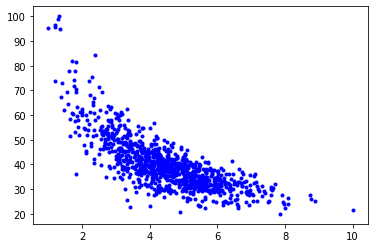

In [72]:
plt.plot(X,y,'b.')

**Ejercicio 1**


---



In [73]:
#1.-Divide los datos del costo de manufactura. Utiliza la función train_test_split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros: {len(X)}')
print("\n")
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("\n")
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros: 1000


Numero total de registros en el training set: 900
Tamaño de X_train: (900, 1)


Mumero total de registros en el test dataset: 100
Tamaño del X_test: (100, 1)


w = [-5.98882699], b = 66.83650741226988
*Coeficiente obtenidos:  [-5.98882699]
*Termino independiente::  66.83650741226988
*MSE: 46.85
*RMSE: 6.84
*R2: 0.57


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


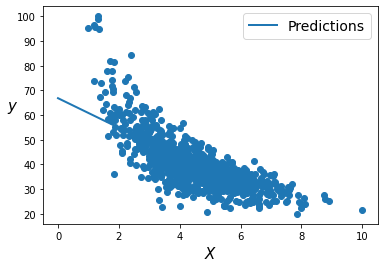

In [74]:
#2.-Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada. 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression(fit_intercept=True)
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

#Modelo generado
print('w = ' + str(regr.coef_) + ', b = ' + str(regr.intercept_))
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('*Coeficiente obtenidos: ', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('*Termino independiente:: ', regr.intercept_)
# Error Cuadrado Medio
print("*MSE: %.2f" % mean_squared_error(y_train, y_pred))
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("*RMSE: %.2f" %rmse)
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('*R2: %.2f' % r2_score(y_train, y_pred))
#Gráfica 
X_fit = np.linspace(0, 2, 100)
y_fit = regr.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.legend(loc="best", fontsize=14);




The model estimates:

$\hat{y} = -5.988X + 66.83$

In [75]:
#3.-Realiza la  regresión polinomial completa, tu modelo generado , su visualización, sus errores y r cuadrada.
from sklearn.preprocessing import PolynomialFeatures
# Generate non-linear data e.g. quadratic equation
m = 100
X2 = regr.coef_ * np.random.rand(m, 1) - 3
y2 = regr.intercept_ * X**2 + X + 2 + np.random.randn(m, 1)
#Gráfica
plt.plot(X2, y2, "g.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

#Using polinomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

ValueError: ignored

In [ ]:
#Poly
print(X[0])
print(X[0]*X[0])

X_poly[0]

#Fitting the model 
lin_reg = linear_model.LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_





In [ ]:
#Gráfica 
#Gráfica 
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "g.")
plt.plot(X_new, y_new, "b.", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

In [ ]:
#4.-Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.


In [ ]:
#5.-Finalmente grafica :MAE (de los cuatro métodos),R2 (de los cuatro métodos)

In [ ]:
#6.-Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4850,6705120280,20150331T000000,428000.0,2,2.50,1414,1960,2.0,0,0,...,8,1414,0,1986,0,98006,47.5423,-122.189,1414,2511
3505,9477000300,20140728T000000,425000.0,4,2.25,2060,8540,1.0,0,0,...,7,1540,520,1967,0,98034,47.7340,-122.190,1560,7700
1131,4039100400,20150506T000000,515000.0,3,2.50,3000,8250,1.0,0,0,...,8,1760,1240,1963,0,98008,47.6191,-122.112,2040,8250
19069,3276980120,20141028T000000,275000.0,3,2.25,1820,9766,1.0,0,0,...,7,1450,370,1987,0,98031,47.3970,-122.203,1860,8236
14860,7625701830,20141023T000000,521000.0,3,2.00,1840,6000,1.0,0,0,...,6,1840,0,1908,1944,98136,47.5508,-122.392,2010,6000
20696,8562770320,20150114T000000,554000.0,3,2.50,2140,4126,2.0,0,0,...,8,1960,180,2005,0,98027,47.5368,-122.073,2280,2615
3334,7792000025,20150211T000000,340000.0,3,1.00,3180,27586,1.0,0,0,...,8,1400,1780,1969,0,98022,47.1986,-121.967,2180,27586
4475,3629970930,20141111T000000,670000.0,3,3.00,2980,3730,2.0,0,0,...,9,2980,0,2005,0,98029,47.5533,-121.995,2710,3640
3806,7227501450,20141016T000000,240000.0,4,1.75,1420,5382,1.0,0,0,...,5,1040,380,1942,0,98056,47.4946,-122.187,1150,5382
13628,2023049218,20140716T000000,105500.0,2,1.00,930,7740,1.0,0,0,...,5,930,0,1932,0,98148,47.4611,-122.324,1620,8584


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Ejercicio 2**


---



In [78]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [79]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


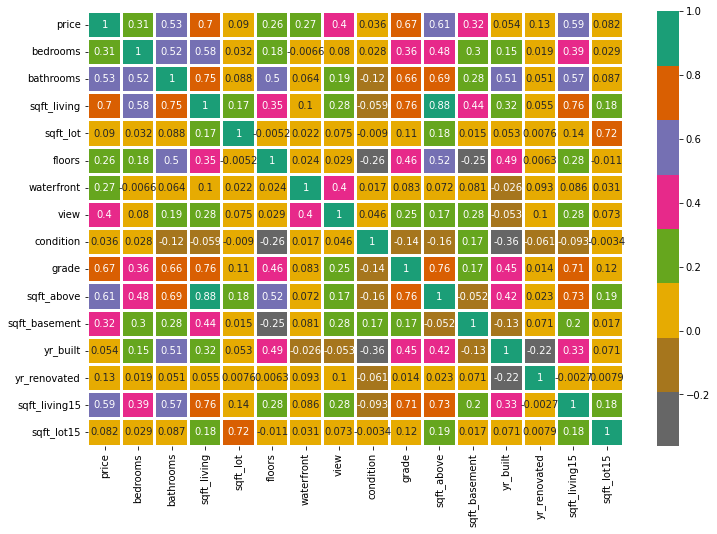

In [80]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [81]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [86]:
#1.-Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X2)}')
print("\n")
print(f'Numero total de registros en el training set: {len(X_train2)}')
print(f'Tamaño de X_train: {X_train2.shape}')
print("\n")
print(f'Mumero total de registros en el test dataset: {len(X_test2)}')
print(f'Tamaño del X_test: {X_test2.shape}')

Numero total de registros en la bdd: 100


Numero total de registros en el training set: 90
Tamaño de X_train: (90, 1)


Mumero total de registros en el test dataset: 10
Tamaño del X_test: (10, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


w = [-5.98882699], b = 66.83650741226988
*Coeficiente obtenidos:  [-5.98882699]
*Termino independiente::  66.83650741226988
*MSE: 45288.43
*RMSE: 212.81
*R2: -0.38


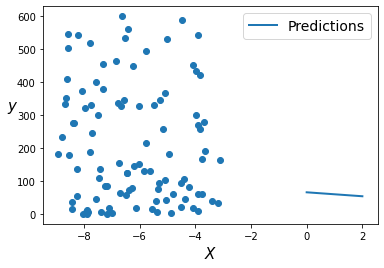

In [88]:
#2.-Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.
# Creamos el objeto de Regresión Linear
regr2 = linear_model.LinearRegression(fit_intercept=True)
 
# Entrenamos nuestro modelo
regr2.fit(X_train2, y_train2)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred2 = regr.predict(X_train2)

#Modelo generado
print('w = ' + str(regr.coef_) + ', b = ' + str(regr.intercept_))
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('*Coeficiente obtenidos: ', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('*Termino independiente:: ', regr.intercept_)
# Error Cuadrado Medio
print("*MSE: %.2f" % mean_squared_error(y_train2, y_pred2))
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mean_squared_error(y_train2, y_pred2))
print("*RMSE: %.2f" %rmse)
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('*R2: %.2f' % r2_score(y_train2, y_pred2))
#Gráfica 
X_fit2 = np.linspace(0, 2, 100)
y_fit2 = regr.predict(X_fit[:, np.newaxis])

plt.scatter(X2, y2)
plt.plot(X_fit2, y_fit2, linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.legend(loc="best", fontsize=14);

In [ ]:
#3.-Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

In [ ]:
#4.-Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.


In [ ]:
#5.-Finalmente gráfica :MAE (de los cuatro métodos) y R2 (de los cuatro métodos)

In [ ]:
#Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?

**Conclusiones**

---

